In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support


In [4]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,columns = cancer.feature_names)
len(df)
#df.head()

569

In [6]:
df.isnull().sum().sum()

0

In [7]:
X = df  # training feature
Y =  pd.Series(cancer.target)

len(X)

569

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.20,shuffle= True,random_state=2)
log_reg_model = LogisticRegression(max_iter = 2500, random_state = 42)

len(X_train)
len(X_test)

114

In [9]:
# Train the model
log_reg_model.fit(X_train,Y_train)


LogisticRegression(max_iter=2500, random_state=42)

In [10]:
#Make Prediction
y_pred = log_reg_model.predict(X_test)

y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0])

In [11]:
Y_test

528    1
291    1
467    1
108    0
340    1
      ..
471    1
449    0
24     0
38     0
230    0
Length: 114, dtype: int64

In [12]:
print("Accuracy :",np.round(accuracy_score(Y_test,y_pred),2))
precision,recall,fscore,_ = precision_recall_fscore_support(Y_test,y_pred,average = 'binary')

Accuracy : 0.93


In [13]:
print("Precision :",np.round(precision,2))
print("Recall :",np.round(recall,2))
print("fscore :",np.round(fscore,2))

Precision : 0.94
Recall : 0.94
fscore : 0.94



Confusion Matrix


Text(50.722222222222214, 0.5, 'True')

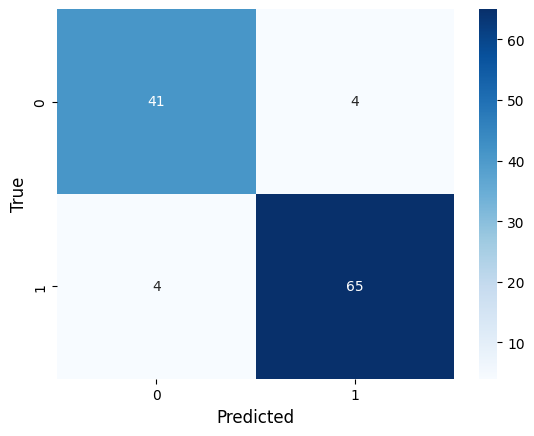

In [14]:
# Make the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_test, y_pred)  # testing data 
print("\nConfusion Matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [15]:
# Logistic Regression using Neural Network layers
from keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
lr_model = Sequential()
lr_model.add(InputLayer(input_shape =(30,)))
lr_model.add(Dense(1,activation = 'sigmoid'))  #0,1
lr_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [21]:
import tensorflow as tf
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.05)
lr_model.compile(optimizer = optimizer,loss = 'binary_crossentropy',metrics = ['Accuracy'])


In [22]:
trained_model = lr_model.fit(X_train,Y_train,epochs = 10, batch_size = 32,validation_split = 0.2,shuffle = False)


Epoch 1/10
12/12 [==============================] - 1s 25ms/step - loss: 6150.8130 - Accuracy: 0.5247 - val_loss: 13828.8271 - val_Accuracy: 0.3736
Epoch 2/10
12/12 [==============================] - 0s 5ms/step - loss: 6776.9448 - Accuracy: 0.4863 - val_loss: 13303.3525 - val_Accuracy: 0.3736
Epoch 3/10
12/12 [==============================] - 0s 4ms/step - loss: 6200.5874 - Accuracy: 0.4918 - val_loss: 13611.4873 - val_Accuracy: 0.3736
Epoch 4/10
12/12 [==============================] - 0s 4ms/step - loss: 4932.0889 - Accuracy: 0.5412 - val_loss: 6529.9746 - val_Accuracy: 0.6264
Epoch 5/10
12/12 [==============================] - 0s 5ms/step - loss: 4216.5869 - Accuracy: 0.5577 - val_loss: 5881.8711 - val_Accuracy: 0.6264
Epoch 6/10
12/12 [==============================] - 0s 4ms/step - loss: 4321.6592 - Accuracy: 0.5934 - val_loss: 183.1500 - val_Accuracy: 0.8352
Epoch 7/10
12/12 [==============================] - 0s 5ms/step - loss: 2127.7043 - Accuracy: 0.7170 - val_loss: 4740.140

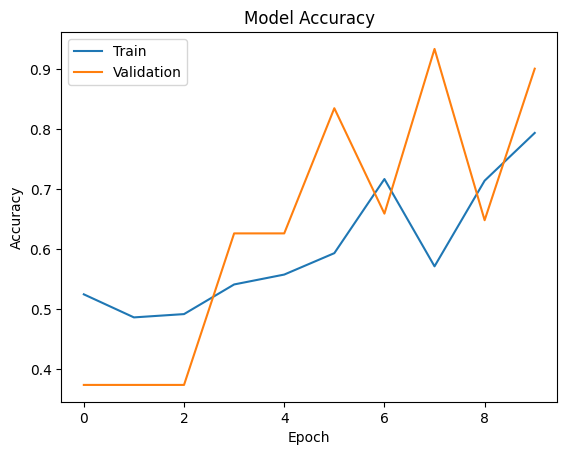

In [23]:
# Plot training and validation accuracy scores
# against the number of epochs.
plt.plot(trained_model.history['Accuracy'], label='Train')
plt.plot(trained_model.history['val_Accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

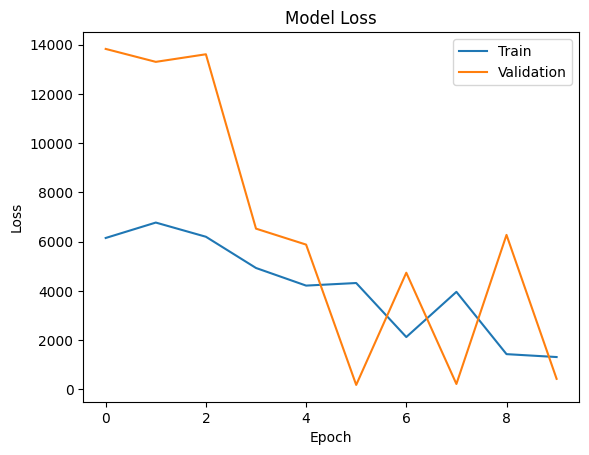

In [24]:
# Plot training and validation loss scores
# against the number of epochs.
plt.plot(trained_model.history['loss'], label='Train')
plt.plot(trained_model.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')

In [25]:
test_loss,test_acc = lr_model.evaluate(X_test,Y_test)
print("Test Loss :",test_loss)
print("Test Accuracy :", test_acc)

4/4 [==============================] - 0s 3ms/step - loss: 424.7071 - Accuracy: 0.9211
Test Loss : 424.70709228515625
Test Accuracy : 0.9210526347160339
